In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Load Data

In [2]:
# read train data
train = pd.read_csv("train_nonCorr.csv")
train['target'] = pd.read_csv('train.csv')['TARGET']

test = pd.read_csv("test_nonCorr.csv")

In [3]:
# determine rows and columns
train.shape, test.shape

((76020, 13), (75818, 12))

### Important features according to Boruta

### Select a smaller range of data for faster visualisation

In [4]:
# select a smaller dataset for faster processing (~20%)
train_bkup = train.copy()  # make a copy for future use
test_bkup = test.copy()

rows = np.random.choice(train.index.values, 22000) # change this number as required.
train = train.ix[rows]

rows_test = np.random.choice(test.index.values, 22000) # change this number as required.
test = test.ix[rows_test]

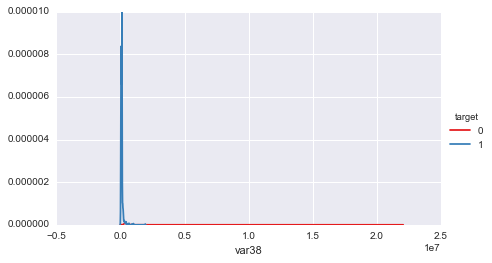

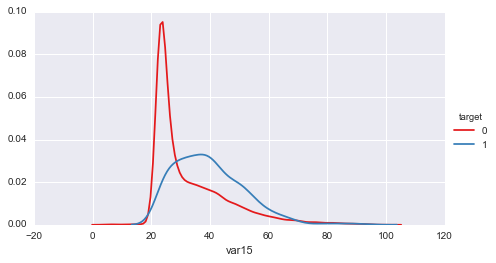

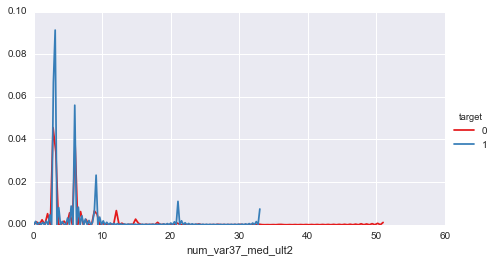

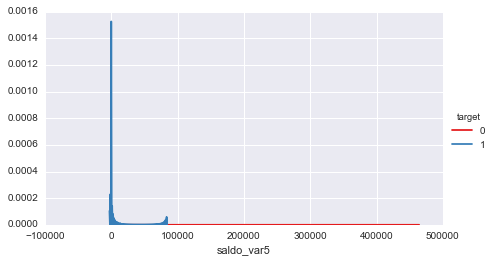

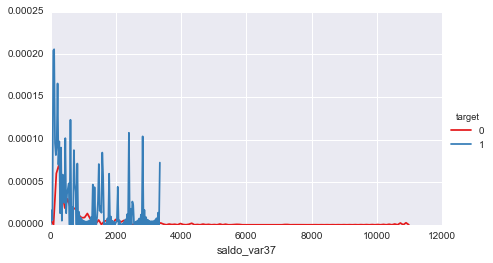

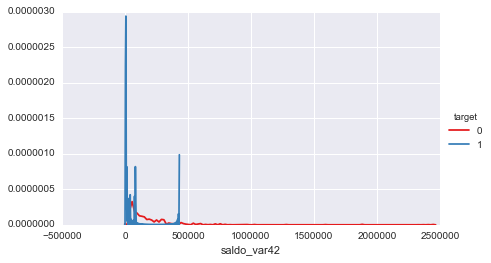

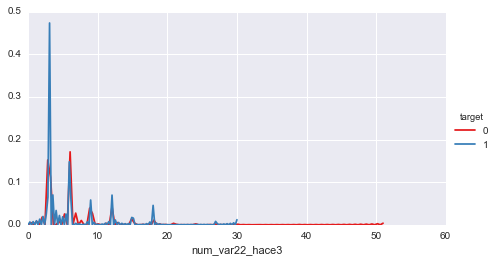

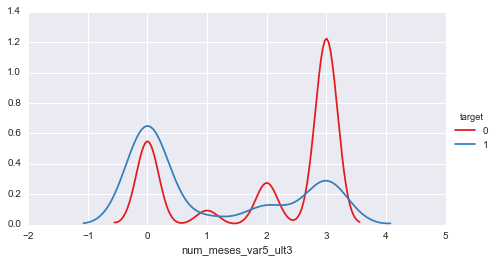

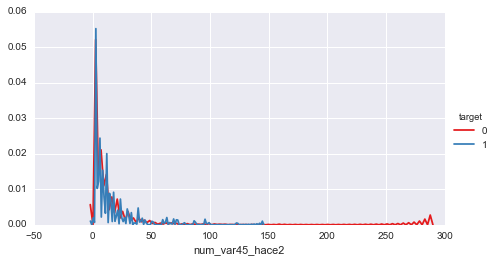

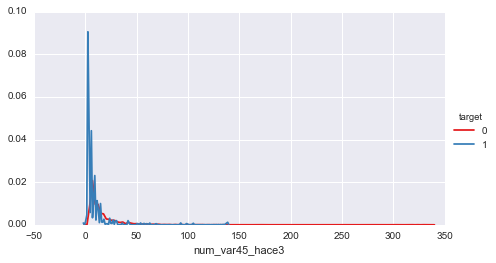

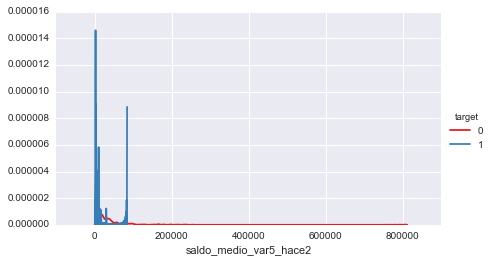

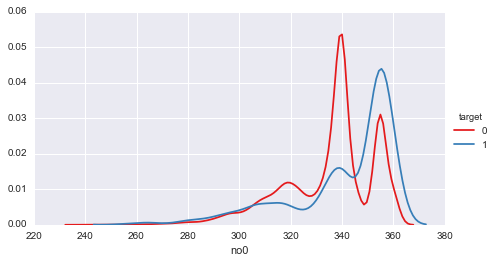

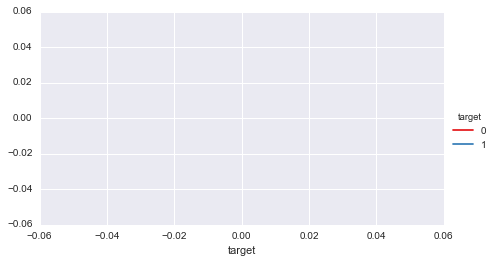

In [6]:
# plot important variables, segregate by 1, 0 of target variable

for i in train.columns:
    facet = sns.FacetGrid(train, hue="target",hue_order=[0, 1], palette="Set1", aspect=2)
    facet.map(sns.kdeplot,i,shade= False)
    facet.add_legend()
    fig = plt.gcf()
    fig.set_size_inches(7, 4)

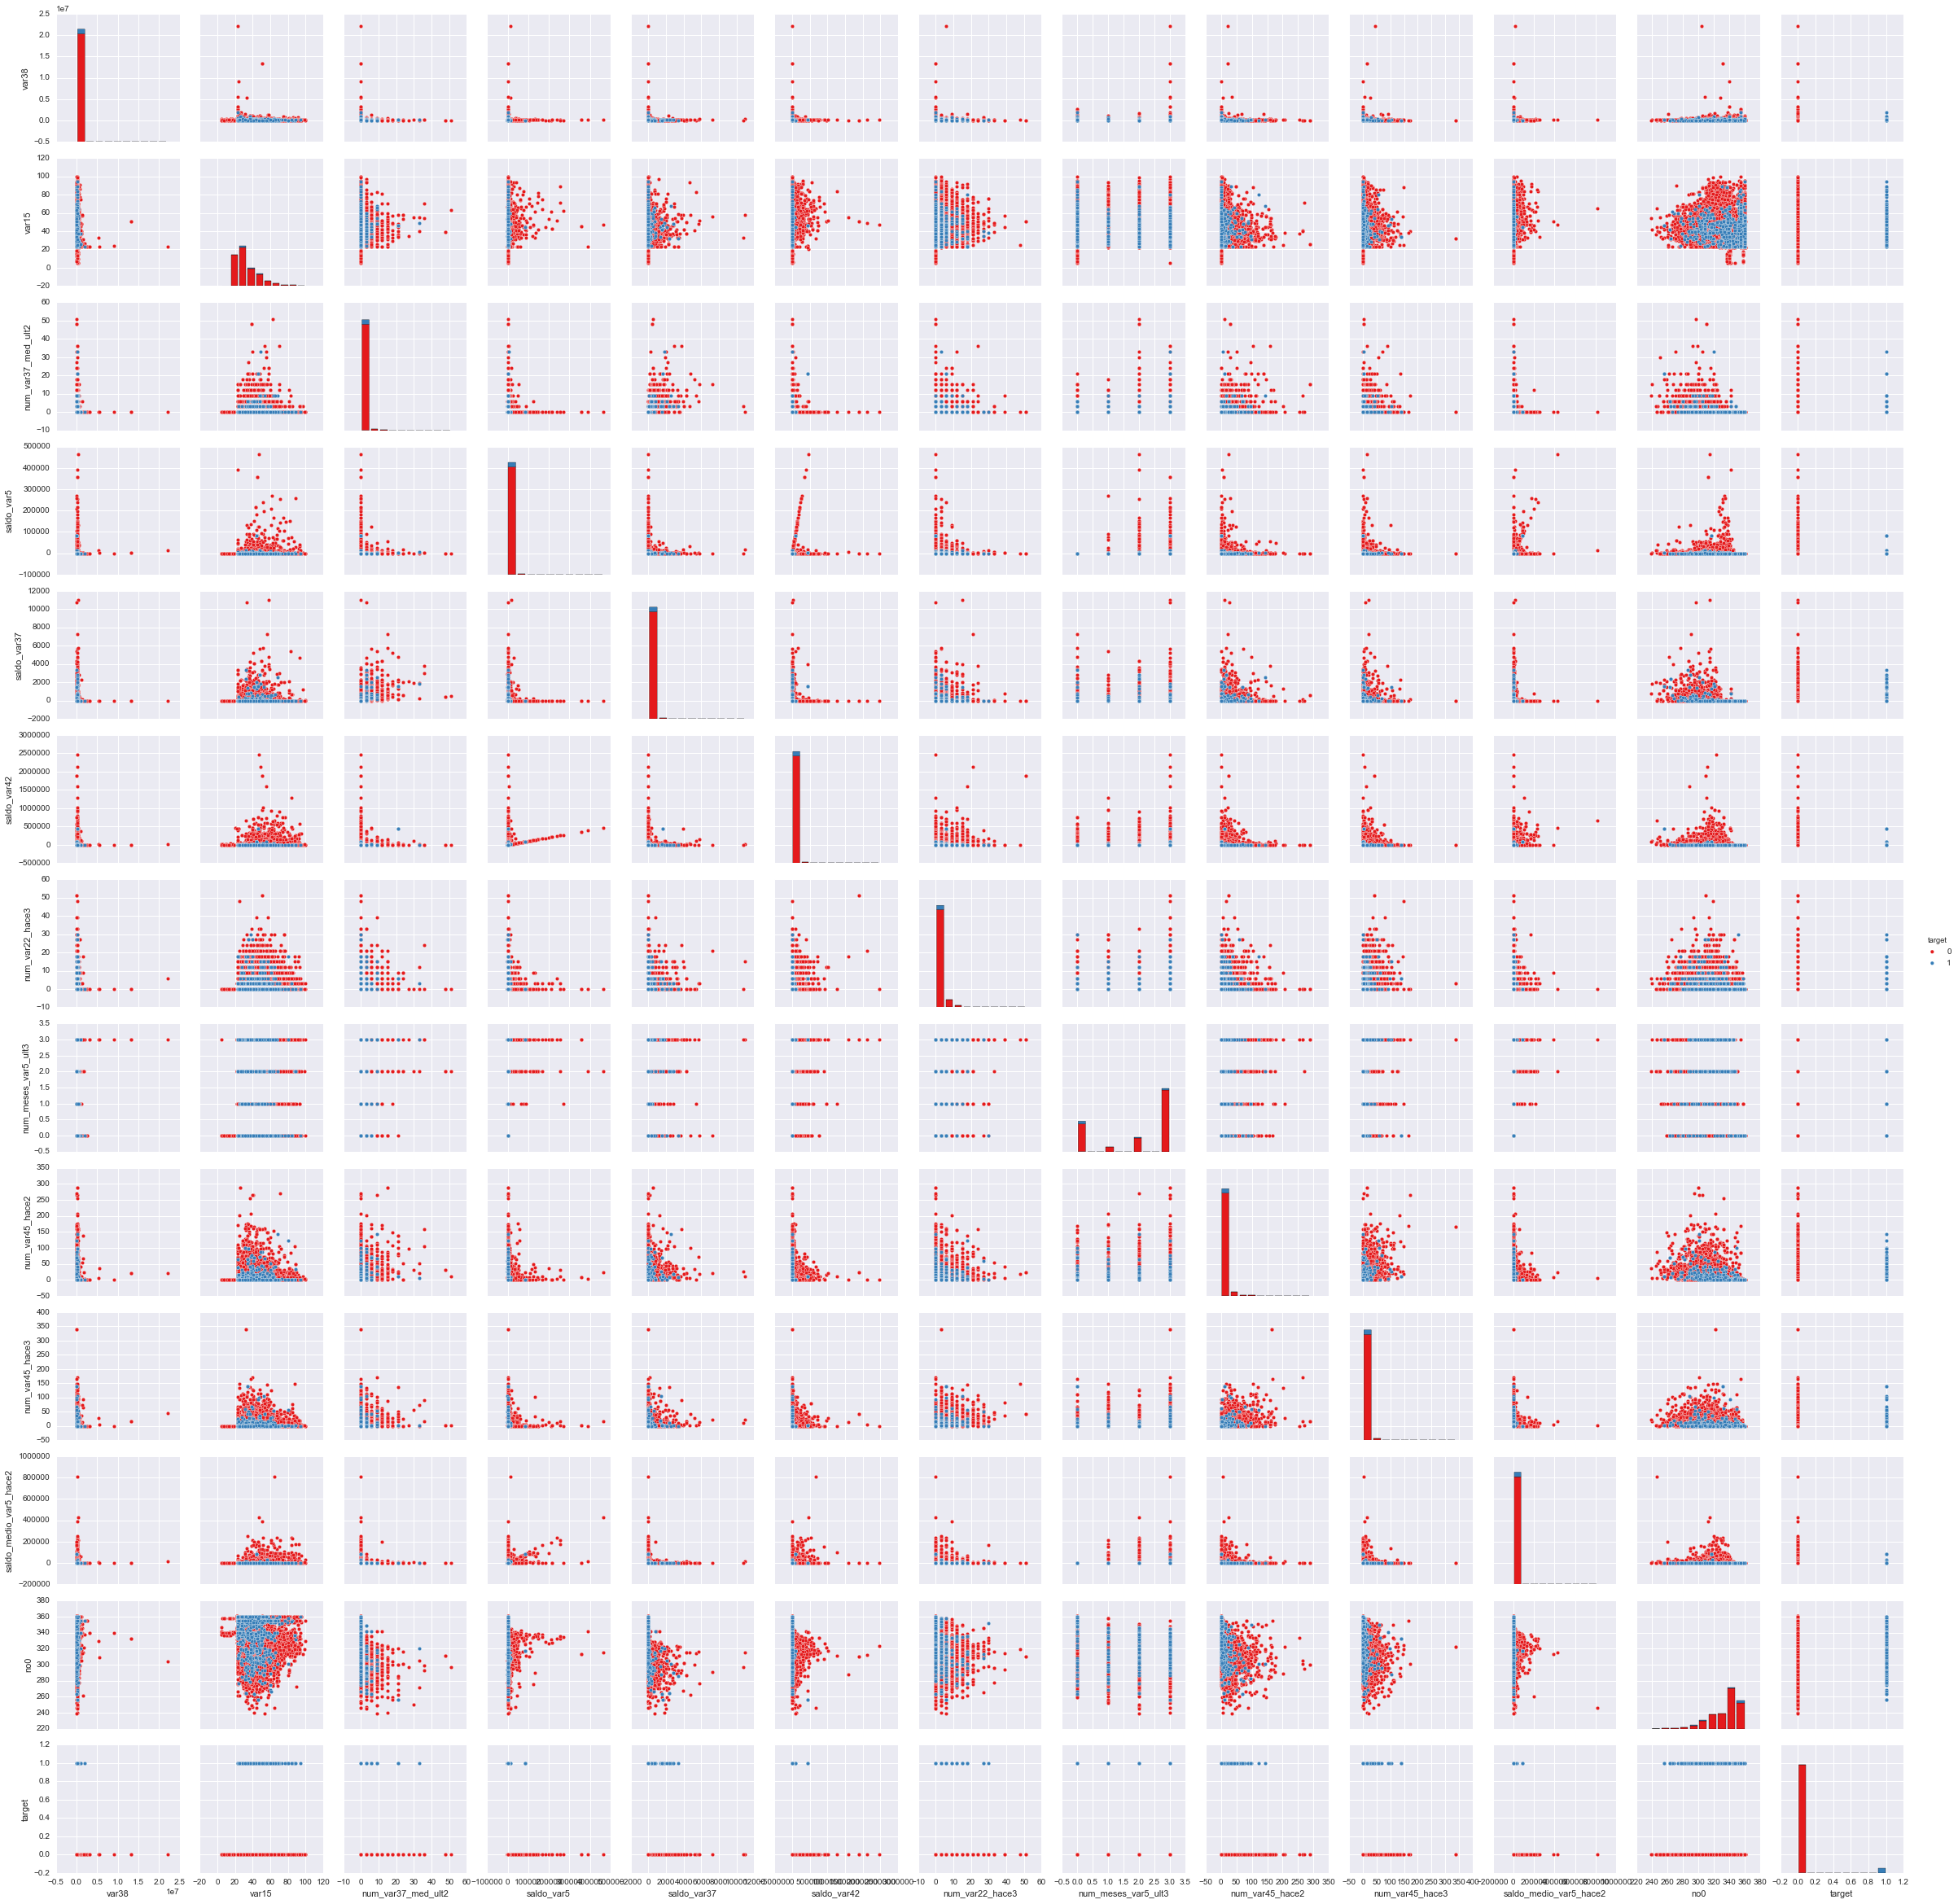

In [7]:
sns.pairplot(train, hue = 'target',
             hue_order=[0, 1], palette="Set1")

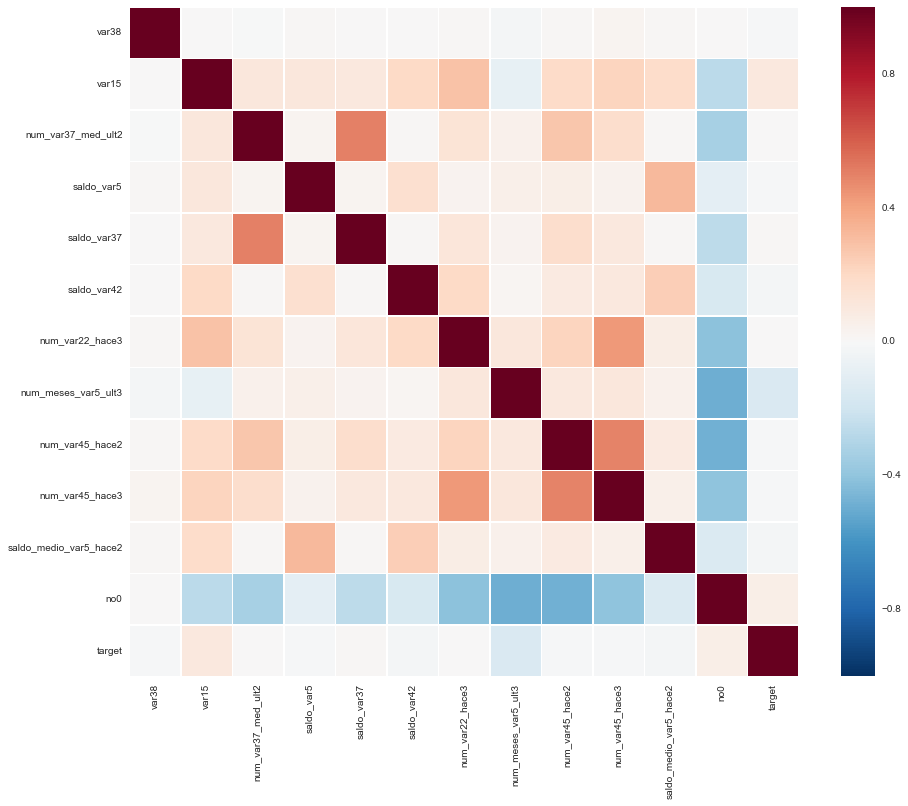

In [8]:
cor_mat = train.corr()

f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax)